#Topic modeling using LDA

In [ ]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
korean['list_token'] = korean['tokenized'].apply(lambda x: ','.join(map(str, x)))
aus['list_token'] = aus['tokenized'].apply(lambda x: ','.join(map(str, x)))
onta['list_token'] = onta['tokenized'].apply(lambda x: ','.join(map(str, x)))

In [ ]:
tfidf = TfidfVectorizer()
kor_tfidf = tfidf.fit_transform(korean['list_token'])
aus_tfidf = tfidf.fit_transform(aus['list_token'])
onta_tfidf = tfidf.fit_transform(onta['list_token'])

In [ ]:
def tfidftop(df):
  pre_tfidf_matrix= tfidf.fit_transform(df).toarray()
  pre_tfidf = tfidf.get_feature_names_out()
  df_pre_tfidf= pd.DataFrame(pre_tfidf_matrix, columns=pre_tfidf)

  df_pre_tfidf = pd.DataFrame(df_pre_tfidf.sum())
  df_pre_tfidf_top = df_pre_tfidf.sort_values(by=0, ascending=False)
  df_pre_tfidf_top = df_pre_tfidf_top.reset_index()
  df_pre_tfidf_top.columns = ['word', 'count']

  return df_pre_tfidf_top

In [ ]:
kor_tfidf_top = tfidftop(korean['list_token'])
aus_tfidf_top = tfidftop(aus['list_token'])
onta_tfidf_top = tfidftop(onta['list_token'])

In [ ]:
kor_tfidf_top.to_excel('kor_tfidf_top.xlsx')
aus_tfidf_top.to_excel('kor_tfidf_top.xlsx')
onta_tfidf_top.to_excel('kor_tfidf_top.xlsx')

##bigram lda


In [ ]:
import gensim.models
import gensim
from gensim import corpora
from nltk.tokenize import word_tokenize
import nltk
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import LdaModel
from gensim.models.callbacks import PerplexityMetric

nltk.download('punkt')

def bigramcorpus(df):
  bigram = gensim.models.Phrases(df, min_count=5, threshold=100)
  bigram_mod = gensim.models.phrases.Phraser(bigram)
  trigram = gensim.models.Phrases(bigram[df], threshold=100)
  trigram_mod = gensim.models.phrases.Phraser(trigram)

  bi = []

  for i in range(0, len(df)):
      bi.append(trigram_mod[bigram_mod[df[i]]])

  dictionary = corpora.Dictionary(bi)
  dictionary.filter_extremes()
  corpus = [dictionary.doc2bow(a_bi) for a_bi in bi]

  return dictionary, corpus, bi

In [ ]:
kor_dict, kor_corpus, kor_bi = bigramcorpus(korlist)
aus_dict, aus_corpus, aus_bi  = bigramcorpus(auslist)
onta_dict, onta_corpus, onta_bi  = bigramcorpus(ontalist)

In [ ]:
def corherence(dictionary, corpus, df):
  min_topics, max_topics = 5, 20

  coherence_scores=[]
  for num_topics in range(min_topics, max_topics):
      model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary,passes = 15)
      coherence = CoherenceModel(model = model, texts=df, dictionary=dictionary)
      coherence_scores.append(coherence.get_coherence())

  import matplotlib.pyplot as plt
  plt.style.use('seaborn-white')

  x = [i for i in range(min_topics, max_topics)]

  plt.figure(figsize=(10,6))
  plt.plot(x, coherence_scores)
  plt.xlabel('Number of Topics')
  plt.ylabel('Coherence Scores')
  plt.show()
  return coherence_scores, plt.show()


<ipython-input-157-7bc2bcb3a977>:17: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


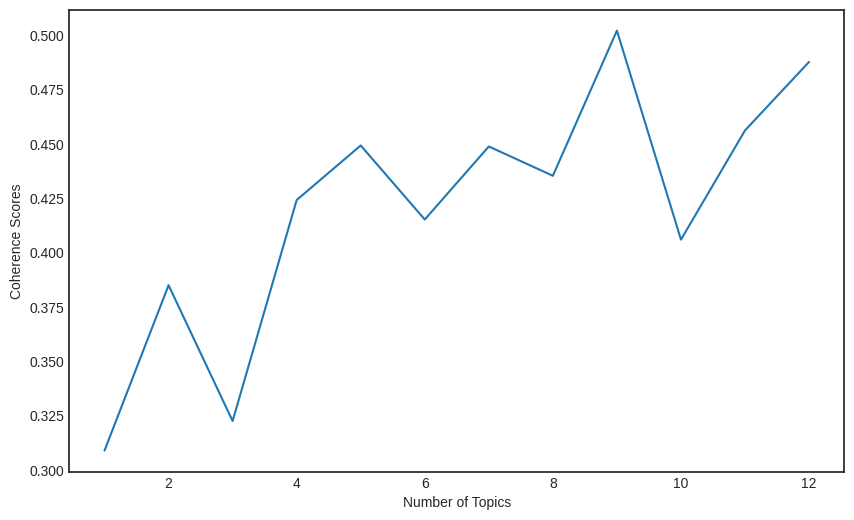

In [ ]:
aus_coherence_scores, x= corherence(aus_dict, aus_corpus, aus_bi)

In [ ]:
aus_coherence_scores

[0.3088282078560986,
 0.38489704396907887,
 0.3224294181671645,
 0.4240839154363835,
 0.44917551382745924,
 0.4151167647662785,
 0.4487124261538768,
 0.4352382386026025,
 0.5020241413286174,
 0.4058565528636421,
 0.4561006689896799,
 0.4876133518465344]

In [ ]:
def ldatopic(corpus, dict, num_topic):

  lda_model = LdaModel(corpus=corpus,
                      id2word=dict,
                      num_topics=num_topic,
                      passes=10,
                      alpha='auto')


  # Visualize LDA model
  #pyLDAvis.enable_notebook()
  #vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
  #vis

  # Get the list of topics and keywords
  topics = lda_model.show_topics(num_topics=-1, num_words=30, formatted=False)

  # Create a DataFrame to store the topics and keywords
  topic_df = pd.DataFrame(columns=['topic', 'keywords'])

  # Iterate over the list of topics and keywords, and add them to the DataFrame
  for i, topic in enumerate(topics):
      keywords = [word[0] for word in topic[1]]
      topic_df.loc[i] = [i, keywords]

  # Print the resulting DataFrame
  return lda_model, topic_df

In [ ]:
kor_lda_moodel, kor_topic= ldatopic(kor_corpus, kor_dict, 11)
aus_lda_moodel, aus_topic= ldatopic(aus_corpus, aus_dict, 9)
onta_lda_moodel, onta_topic= ldatopic(onta_corpus, onta_dict, 13)

In [ ]:
onta_topic

,topic,keywords
0,0,"[word, group, variety, purpose, understanding,..."
1,1,"[teacher, skill, prompt, strategy, read, ident..."
2,2,"[text, identify, idea, strategy, variety, topi..."
3,3,"[view, point, text, identify, story, book, top..."
4,4,"[text, idea, oral, inference, interpret, state..."
5,5,"[medium, audience, form, identify, produce, cr..."
6,6,"[text, word, familiar, extend, read, understan..."
7,7,"[purpose, audience, read, text, identify, voca..."
8,8,"[mark, restate, story, punctuation, demonstrat..."
9,9,"[word, sentence, language, include, meaning, e..."


In [ ]:
kor_topic.to_excel('kor_topic.xlsx')
aus_topic.to_excel('aus_topic.xlsx')
onta_topic.to_excel('onta_topic.xlsx')